# Visualization - Data Science Kaggle Survey 

In this notebook you will work on your visualization skills. In the repo you will find a dataset from Kaggle. Every year, Kaggle conducts a survey on the topic of Data Science and Machine Learning. An invitation to participate in the survey is sent out to the entire Kaggle community. The survey is also promoted on the Kaggle website and Kaggle Twitter channel. The 2020 survey results were used as data for a Kaggle competition held at the end of the year. When evaluating the submissions, particular attention was paid to originality, a good structure/narrative and, last but not least **informative and appealing visualizations**.

The survey contained 35 questions, most of which were multiple-choice. These questions allowed either one or more selected answers. Responses to multiple-choice questions where only a single choice could be selected were recorded in individual columns. Responses to multiple selection questions (multiple choices can be selected) were split into multiple columns (with one column per answer choice).

Since this kind of data structure requires a lot of preprocessing before the visualization part can even begin, we decided to make the task a little easier. 
The dataset [kaggle_survey.csv](kaggle_survey.csv) that you will use for the following exercise contains only the questions whose responses where collected in a single column. 
If you need further information about the [methodology](kaggle_survey_2020_methodology.pdf) of the survey or the [questions](kaggle_survey_2020_answer_choices.pdf) and their possible answer options you will find two PDF-files with additional information in this repo.

## Your Task

Let's imagine the following scenario:

You got a new dataset from one of your stakeholders. Additionally to the dataset you received an email with a couple of very specific questions your stakeholder is interested in. 
Your task for this exercise is to create plots that clearly visualize the answers to your stakeholder's questions.

You will find your stakeholder's questions further down in the notebook. To help you get started and get an overview over the data we prepared a list of all the questions, which are still included in the shortened dataset: 


| Question # | Database Column                  | Question                                                                                                                                                                    |      
| ---------- | -------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | 
| Q1         | age_range                        | What is your age (# years)?                                                                                                                                                 |                |           |                                    |
| Q2         | gender                           | What is your gender?                                                                                                                                                        |                |           |                                    |
| Q3         | county_residence                 | In which country do you currently reside?                                                                                                                                   |                |           |                                    |
| Q4         | highest_education                | What is the highest level of formal education that you have attained or plan to attain within the next 2 years?                                                             |                |           |                                    |
| Q5         | latest_job_role                  | Select the title most similar to your current role (or most recent title if retired)                                                                                        |                |           |                                    |
| Q6         | years_of_programming             | For how many years have you been writing code and/or programming?                                                                                                           |                |           |                                    |
| Q8         | programming_language_recommended | What programming language would you recommend an aspiring data scientist to learn first?                                                                                    |                |           |                                    |
| Q11        | computing_platforms              | What type of computing platform do you use most often for your data science projects?                                                                                       |                |           |                                    |
| Q13        | times_tpu_used                   | Approximately how many times have you used a TPU (tensor processing unit)?                                                                                                  |                |           |                                    |
| Q15        | years_of_experience              | For how many years have you used machine learning methods?                                                                                                                  |                |           |                                    |
| Q20        | size_of_company                  | What is the size of the company where you are employed?                                                                                                                     |                |           |                                    |
| Q21        | number_of_data_scientists        | Approximately how many individuals are responsible for data science workloads at your place of business?                                                                    |                |           |                                    |
| Q22        | employer_incorporate_ml          | Does your current employer incorporate machine learning methods into their business?                                                                                        |                |           |                                    |
| Q24        | yearly_earnings                  | What is your current yearly compensation (approximate \$USD)?                                                                                                                |                |           |                                    |
| Q25        | money_spend_on_cloud             | Approximately how much money have you (or your team) spent on machine learning and/or cloud computing services at home (or at work) in the past 5 years (approximate \$USD)? |                |           |                                    |
| Q30        | most_used_data_products          | Which of the following big data products (relational database                                                                                                                data warehouse  data lake  or similar) do you use most often? |
| Q32        | most_used_bi_tool                | Which of the following business intelligence tools do you use most often?                                                                                                   |                |           |                                    |
| Q38        | primary_tool_data_analysis       | What is the primary tool that you use at work or school to analyze data?                                                                                                    |                |           |                                    |
|            |                                  |                                                                                                                                                                             |                |           |                                    |



## Setup and Import

As always, the first step is to import the required libraries and data. Since we do not want to run the SQL query every time, we can simply import the csv file we created in the first notebook.

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
# Import dataframe
df = pd.read_csv("kaggle_survey.csv")


## Getting to Know the Data

Before you can start visualizing, you should get an overview of the data. Is the format of the data suitable for visualization or do you need to adjust something here and there?

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20036 entries, 0 to 20035
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   id                                20036 non-null  int64 
 1   age_range                         20036 non-null  object
 2   gender                            20036 non-null  object
 3   county_residence                  20036 non-null  object
 4   highest_education                 19569 non-null  object
 5   latest_job_role                   19277 non-null  object
 6   years_of_programming              19120 non-null  object
 7   programming_language_recommended  17740 non-null  object
 8   computing_platforms               16737 non-null  object
 9   times_tpu_used                    16780 non-null  object
 10  years_of_experience               16374 non-null  object
 11  size_of_company                   11403 non-null  object
 12  number_of_data_sci

## Visualisations



Now that you have a feel for the data, let's start to work on the tasks of your stakeholder. 

### 1. Plot

Your stakeholder wants to have a visual comparison between the yearly compensation of people who work as Data Scientists, Data Analysts, and Data Engineers. 

Unfortunately with the format of the entries in column "Q24" plotting the data is really cumbersome. Since the focus of this exercise is on plotting we will assist you a bit with the data preparation and provide you with a code snippet that will transform the strings in this column into one integer per entry, which then can be easily plotted. (Maybe you need to adapt the name of the dataframe etc. to get the code running.) 

In [79]:

# Create grouped dataframe for compensation / job title
compensation = df[['latest_job_role', 'yearly_earnings']].groupby(['latest_job_role', 'yearly_earnings']).size().to_frame('Count').reset_index()

# Define function for extracting the first number of compensation column
def get_first_number(x):
    x = x.split('-')[0]
    x = x.replace(',', '').replace('>', '').replace('$', '').lstrip()
    return int(x)

def get_second_number(x):
    try:
        x = x.split('-')[1]
        x = x.replace(',', '').replace('>', '').replace('$', '').lstrip()
    except:
        return get_first_number(x)
    return int(x)

# Apply function to Q24 column to generate new column
compensation['Salary_lower'] = compensation['yearly_earnings'].apply(lambda x: get_first_number(x))

compensation['Salary_upper'] = compensation['yearly_earnings'].apply(lambda x: get_second_number(x))

# Filter dataframe for relevant job titles 
data_compensation_agg = compensation[compensation['latest_job_role'].
                                 isin(['Data Scientist', 'Data Analyst','Data Engineer'])]
data_compensation_agg.head(50)

,latest_job_role,yearly_earnings,Count,Salary_lower,Salary_upper
45,Data Analyst,$0-999,301,0,999
46,Data Analyst,"1,000-1,999",87,1000,1999
47,Data Analyst,"10,000-14,999",85,10000,14999
48,Data Analyst,"100,000-124,999",51,100000,124999
49,Data Analyst,"125,000-149,999",16,125000,149999
50,Data Analyst,"15,000-19,999",61,15000,19999
51,Data Analyst,"150,000-199,999",8,150000,199999
52,Data Analyst,"2,000-2,999",39,2000,2999
53,Data Analyst,"20,000-24,999",43,20000,24999
54,Data Analyst,"200,000-249,999",5,200000,249999


In [80]:
# Create grouped dataframe for compensation / job title
compensation = df[['latest_job_role', 'yearly_earnings']].dropna()

# Define function for extracting the first number of compensation column
def get_first_number(x):
    x = x.split('-')[0]
    x = x.replace(',', '').replace('>', '').replace('$', '').lstrip()
    return int(x)

def get_second_number(x):
    try:
        x = x.split('-')[1]
        x = x.replace(',', '').replace('>', '').replace('$', '').lstrip()
    except:
        return get_first_number(x)
    return int(x)

# Apply function to Q24 column to generate new column
compensation['Salary_lower'] = compensation['yearly_earnings'].apply(lambda x: get_first_number(x))

compensation['Salary_upper'] = compensation['yearly_earnings'].apply(lambda x: get_second_number(x))

# # Filter dataframe for relevant job titles 
data_compensation = compensation[compensation['latest_job_role'].
                                isin(['Data Scientist', 'Data Analyst','Data Engineer'])]
data_compensation.head(50)

,latest_job_role,yearly_earnings,Salary_lower,Salary_upper
1,Data Engineer,"100,000-124,999",100000,124999
3,Data Scientist,"125,000-149,999",125000,149999
8,Data Scientist,"70,000-79,999",70000,79999
13,Data Engineer,"90,000-99,999",90000,99999
21,Data Scientist,$0-999,0,999
23,Data Analyst,"10,000-14,999",10000,14999
32,Data Analyst,"15,000-19,999",15000,19999
39,Data Scientist,"4,000-4,999",4000,4999
41,Data Scientist,"> $500,000",500000,500000
43,Data Analyst,$0-999,0,999


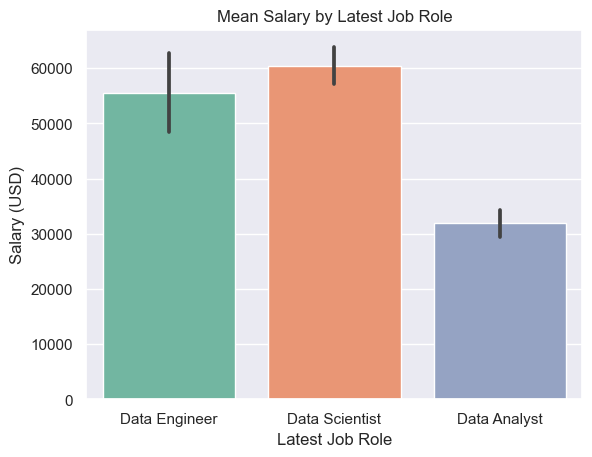

In [135]:
sns.set_theme()
colors = sns.color_palette("Set2")


fig = sns.barplot(
    data=data_compensation,
    x="latest_job_role",
    y="Salary_upper",
    estimator="mean",
    palette=colors,
)

fig.set(title="Mean Salary by Latest Job Role",
        xlabel="Latest Job Role",
        ylabel="Salary (USD)")
plt.show()

# g = sns.histplot(
#     x="Salary_upper",
#     data=data_compensation,
#     hue="latest_job_role",
#     stat="percent",
#     element="poly",
#     multiple="dodge"
# )

### 2. Plot

Your stakeholder wants to know the gender distribution in the countries where most people participated in the survey. He is interested in the top 10 countries.
And in the top 10 countries with the most number of female survey participants.


In [82]:
df.head()

,id,age_range,gender,county_residence,highest_education,latest_job_role,years_of_programming,programming_language_recommended,computing_platforms,times_tpu_used,years_of_experience,size_of_company,number_of_data_scientists,employer_incorporate_ml,yearly_earnings,money_spend_on_cloud,most_used_data_products,most_used_bi_tool,primary_tool_data_analysis
0,7232,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",2-5 times,1-2 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Basic statistical software (Microsoft Excel, G..."
1,7233,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,A personal computer or laptop,2-5 times,1-2 years,"10,000 or more employees",20+,"We have well established ML methods (i.e., mod...","100,000-124,999","$100,000 or more ($USD)",PostgresSQL,Microsoft Power BI,"Business intelligence software (Salesforce, Ta..."
2,7234,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,R,A personal computer or laptop,Never,I do not use machine learning methods,"1000-9,999 employees",0,No (we do not use ML methods),"15,000-19,999",$0 ($USD),NaN,NaN,"Basic statistical software (Microsoft Excel, G..."
3,7235,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",2-5 times,3-4 years,250-999 employees,5-9,"We have well established ML methods (i.e., mod...","125,000-149,999","$10,000-$99,999",MySQL,NaN,"Local development environments (RStudio, Jupyt..."
4,7236,30-34,Man,Japan,Master’s degree,Software Engineer,3-5 years,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


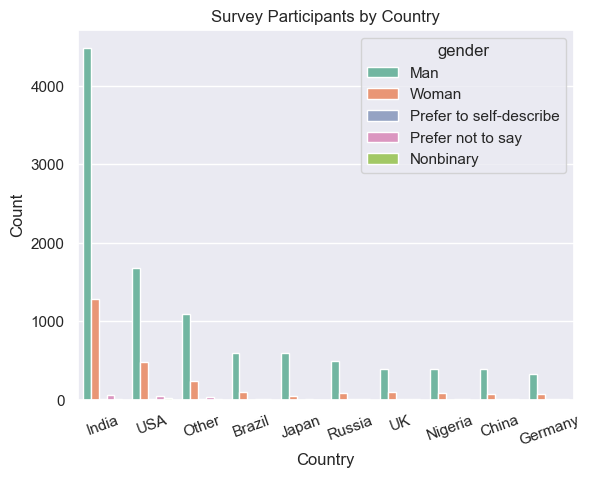

In [98]:
# replace country names for UK,USA
df.county_residence = df.county_residence.str.replace("United States of America","USA")
df.county_residence = df.county_residence.str.replace("United Kingdom of Great Britain and Northern Ireland","UK")

fig = sns.countplot(
    data=df,
    x="county_residence",
    hue="gender",
    order=df['county_residence'].value_counts().index[:10],
    palette=colors,
)

fig.set(title="Survey Participants by Country",
        xlabel="Country",
        ylabel="Count")

plt.xticks(rotation=20)
plt.show()

### 3. Plot

According to the study, aspiring Data Scientists are most often recommended to learn Python. Since Python is widely known in the stakeholder's company, he would like to know which language is most recommended after Python. He also suspects that there might be a difference in recommended languages depending on the title of the survey participant's current role and he wants to know what people with the job title "Data Scientist", "Data Analyst", and "Data Engineer" recommend. Can you confirm or reject his assumption with a/some suitable plot(s)?

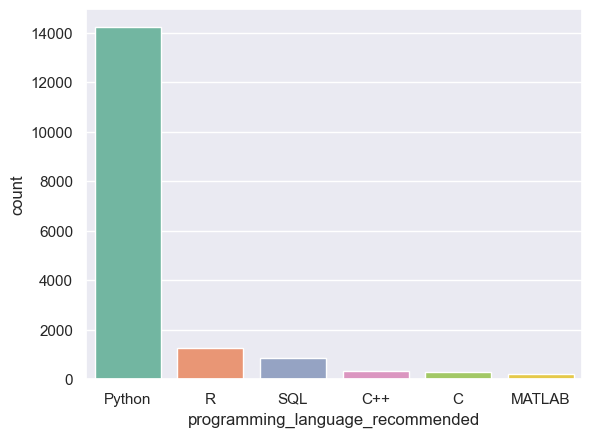

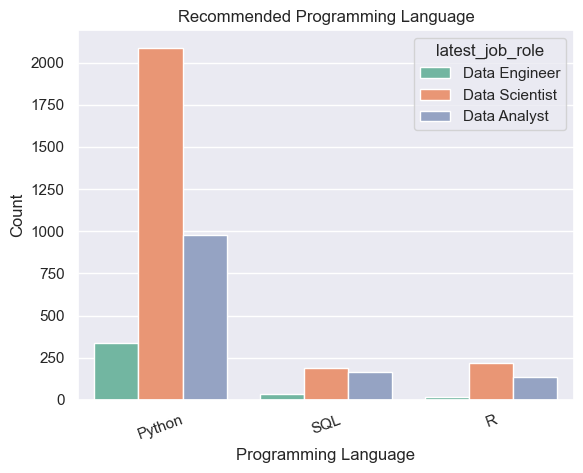

In [134]:
pl_df = df[
    df["latest_job_role"].isin(["Data Scientist", "Data Analyst", "Data Engineer"])
]

fig = sns.countplot(
    data=df,
    x="programming_language_recommended",
    order=df["programming_language_recommended"].value_counts().index[:6],
    palette=colors,
)
plt.show()

fig = sns.countplot(
    data=pl_df,
    x="programming_language_recommended",
    order=pl_df["programming_language_recommended"].value_counts().index[:3],
    hue="latest_job_role",
    palette=colors,
)

fig.set(
    title="Recommended Programming Language",
    xlabel="Programming Language",
    ylabel="Count",
)

plt.xticks(rotation=20)
plt.show()

### Extra 

Now its up to you. If you're still motivated have another look at the data. What do you think is interesting or maybe different than expected?